16. Suma todos los digitos de 2^1000

In [17]:
a = str(2**1000)
sumas=0
for i in a:
    sumas += int(i)
print(sumas)

1366


17.Cuantas letras se usan para escribir todos los numeros del 1 al 1000

In [36]:
# cantidad de letras para los primeros 19 numeros:

import numpy as np

nums = [0,3,3,5,4,4,3,5,5,4,3,6,6,8,8,7,7,9,8,8]
# cantidad de letras en cada decena

decenas= [0,0,6,6,5,5,5,7,6,6]
#letras en hundred = 7 , letras en and = 3, letras de 1000 = 11

primeros19 = np.sum(nums)
suma100 = primeros19
for i in range (20,100):
    suma100 = suma100 + decenas[int(str(i)[0])] + nums[int(str(i)[1])]

print(suma100)

#suma da los primeros 99 numeros. de 100 a 199 tienen la misma longitud pero m'as 3 + 7 +3  y asi
sumatot = suma100

for i in range(1,10):
    sumatot = sumatot +suma100 + (7+3+nums[i])*100-3 #-3 porque el primer hundred no tiene and

print(sumatot+11)



854
21124


18. De todos los caminos en el triangulo, encontrar el recorrido con la menor suma
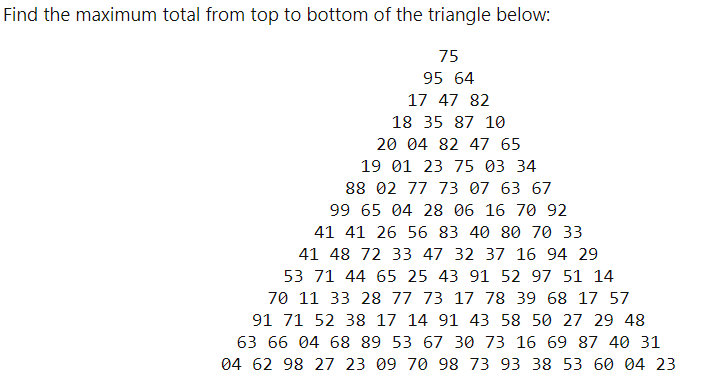

In [26]:
''' Usando Djikstra'''
#Voy a ver el problema como un grafo que hay que transversar con el algoritmo de Djisktra pero para max
#en vez de min
import numpy as np
from collections import deque
import math


#En este archivo leemos la piramide y le damos la estructura de grafo 
# con los pesos dados por el problema.
#Leemos el archivo
f = open("problema18.txt", "r")
array = []
line = f.readline()
index = 0
while line:
    line = line.strip("\n")
    line = line.split()
    for item in line:
        array.append(100-int(item))
    line = f.readline()
    index += 1
f.close()



#array tiene todos los costos de las conexiones. 
print(array)
#n es la cantidad de nodos
n = len(array)
print(n)

# l es la cantidad de filas
l = int((-1+np.sqrt(1+8*n))/2)
print(l)

''' Usamos una libreria que tiene el dijstra implementado'''
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
import numpy


#creamos un grafo con la cantidad de nodos
#en la posicion (i,j) hay que poner el peso de ir de i a j. 
graph = np.zeros((n,n))

def hijo(n):
    #dado que un nodo est'a en posici'on n en el arbol, cual es la posicion de su hijo izquierd
    
    #la fila de n se consigue como:
    fila = int(math.floor(-1/2+(1+8*n)**(1/2)/2))
    #la columna est'a dada por
    col = n - ((fila-1)**2+fila-1)/2
    #la columna del hijo es la misma, pero la fila es una mas
    
    hijo = (fila**2+fila)/2 + col+1
    return(int(hijo))
   
    
#vamos agregando las conexiones, que hay tantas como n(n-1)
for i in range(n-l):
    graph[i,hijo(i)] = array[i]
    graph[i,hijo(i)+1] = array[i]
graph = csr_matrix(graph)
print(graph)

dist_matrix, predecessors = dijkstra(csgraph=graph, indices=0, return_predecessors=True)

ult = dist_matrix[n-l:n]
print(ult)

for i in range(len(ult)):
    ult[i] = ult[i]+array[n-15+i]
print(ult)

print(100*l-min(ult))

[25, 5, 36, 83, 53, 18, 82, 65, 13, 90, 80, 96, 18, 53, 35, 81, 99, 77, 25, 97, 66, 12, 98, 23, 27, 93, 37, 33, 1, 35, 96, 72, 94, 84, 30, 8, 59, 59, 74, 44, 17, 60, 20, 30, 67, 59, 52, 28, 67, 53, 68, 63, 84, 6, 71, 47, 29, 56, 35, 75, 57, 9, 48, 3, 49, 86, 30, 89, 67, 72, 23, 27, 83, 22, 61, 32, 83, 43, 9, 29, 48, 62, 83, 86, 9, 57, 42, 50, 73, 71, 52, 37, 34, 96, 32, 11, 47, 33, 70, 27, 84, 31, 13, 60, 69, 96, 38, 2, 73, 77, 91, 30, 2, 27, 7, 62, 47, 40, 96, 77]
120
15
  (0, 1)	25.0
  (0, 2)	25.0
  (1, 3)	5.0
  (1, 4)	5.0
  (2, 4)	36.0
  (2, 5)	36.0
  (3, 6)	83.0
  (3, 7)	83.0
  (4, 7)	53.0
  (4, 8)	53.0
  (5, 8)	18.0
  (5, 9)	18.0
  (6, 10)	82.0
  (6, 11)	82.0
  (7, 11)	65.0
  (7, 12)	65.0
  (8, 12)	13.0
  (8, 13)	13.0
  (9, 13)	90.0
  (9, 14)	90.0
  (10, 15)	80.0
  (10, 16)	80.0
  (11, 16)	96.0
  (11, 17)	96.0
  (12, 17)	18.0
  :	:
  (92, 107)	34.0
  (93, 107)	96.0
  (93, 108)	96.0
  (94, 108)	32.0
  (94, 109)	32.0
  (95, 109)	11.0
  (95, 110)	11.0
  (96, 110)	47.0
  (96, 111)	47.

In [25]:
''' Sin usar Djistra'''
#Vamos a ir de abajo hacia arriba y vamos reduciendo cada triangulito de 3 elementos en la zona inferior

import numpy as np
from collections import deque
import math


#En este archivo leemos la piramide y le damos la estructura de grafo 
# con los pesos dados por el problema.
#Leemos el archivo
f = open("problema18.txt", "r")
array = []
line = f.readline()
index = 0
while line:
    line = line.strip("\n")
    line = line.split()
    line= [int(x) for x in line]
    array.append(line)
    line = f.readline()
f.close()





# l es la cantidad de filas
l =len(array)
#n es la cantidad de eleemntos.
n = int(l*(l+1)/2)
print(l,n)


#vamos de las filas desde abajo hacia arriba
for j in range(l,1,-1):
    #sacamos la ultima linea del array
    linea= array.pop()
    # para cada elemento de la penultima linea
    for k in range(0,j-1):
        #vemos cual es el maximo de los dos elementos abajo
        maxim = max(linea[k], linea[k+1])
        #le sumamos el maximo 
        array[-1][k] = array[-1][k] + maxim

print(array[0][0])

        


15 120
1074


19. Cuantos domingos cayeron el primero del mesdesde 1/01/1901 hasta 31/12/00. 
Tomar en cuenta que 1/01/1900 fue lunes

In [1]:
def esleap(ano):
    result = False
    if ano% 4 == 0:
        result= True
    if ano % 100 == 0:
        result = False
    if ano % 400 == 0:
        result =True
    return(result)
    

    
anoreg = [31,28,31,30,31,30,31,31,30,31,30,31]
anoleap = [31,29,31,30,31,30,31,31,30,31,30,31]

def main():
    sundaycounter=0
    currentday= (1 + 365) % 7
    
    for i in range(1901,2001):
        if esleap(i) == True:
            for j in anoleap:
                currentday = (currentday + j)%7
                if currentday%7 ==0:
                    sundaycounter += 1
        else:
            for j in anoreg:
                currentday = (currentday + j)%7
                if currentday%7 ==0:
                    sundaycounter += 1
    return(sundaycounter)

print(main())

    


171


20. Encuentra la suma de todos los digitos de 100!

In [20]:
import math

a = str(math.factorial(100))
s = 0
for i in a:
    s = s + int(i)
    
print(s)

648
